<a href="https://colab.research.google.com/github/suzy-hur/IOD_lab_work/blob/main/IOD_Capstone_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Motive and Goals:

In this project, we aim to predict the likelihood of strokes using machine learning algorithms, enabling personalised treatments, efficient resource allocation, and informed lifestyle choices to reduce the impact of strokes on public health.

In [25]:
# Data loading

import pandas as pd

# Load the dataset into a Pandas DataFrame
dataset = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(dataset)

In [26]:
# Data cleaning and preprocessing

df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [28]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [29]:
df.shape

(5110, 12)

In [30]:
null_values = df.isnull()

# Count the null values in each column
null_counts = null_values.sum()

print(null_counts)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [36]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

DT_bmi_pipe = Pipeline( steps=[
                               ('scale',StandardScaler()),
                               ('lr',DecisionTreeRegressor(random_state=42))
                              ])
X = df[['age','gender','bmi']].copy()
X.gender = X.gender.replace({'Male':0,'Female':1,'Other':-1}).astype(np.uint8)

Missing = X[X.bmi.isna()]
X = X[~X.bmi.isna()]
Y = X.pop('bmi')
DT_bmi_pipe.fit(X,Y)
predicted_bmi = pd.Series(DT_bmi_pipe.predict(Missing[['age','gender']]),index=Missing.index)
df.loc[Missing.index,'bmi'] = predicted_bmi

In [37]:
print('Missing values: ',sum(df.isnull().sum()))

Missing values:  0


<ipython-input-38-5a0d5ec5902c>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


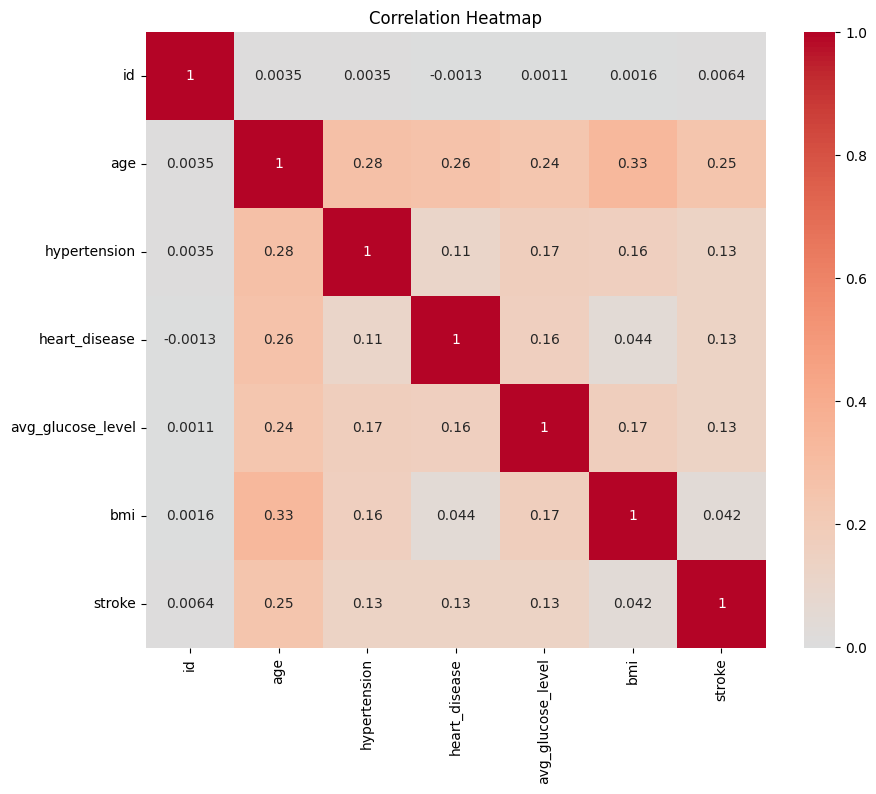

In [38]:
# Data visualisation and EDA

# Correlation Matrix and Heatmap:
# Visualize pairwise correlations between numeric variables like age, hypertension, heart disease, avg_glucose_level, and bmi
# This is to identify potential associations and dependencies

import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()

In [57]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Print the correlation matrix with numerical values
print(correlation_matrix)


                         id       age  hypertension  heart_disease  \
id                 1.000000  0.003677      0.003610      -0.001253   
age                0.003677  1.000000      0.276367       0.263777   
hypertension       0.003610  0.276367      1.000000       0.108292   
heart_disease     -0.001253  0.263777      0.108292       1.000000   
avg_glucose_level  0.000943  0.238323      0.174540       0.161907   
bmi                0.001754  0.334690      0.164873       0.043588   
stroke             0.006430  0.245239      0.127891       0.134905   

                   avg_glucose_level       bmi    stroke  
id                          0.000943  0.001754  0.006430  
age                         0.238323  0.334690  0.245239  
hypertension                0.174540  0.164873  0.127891  
heart_disease               0.161907  0.043588  0.134905  
avg_glucose_level           1.000000  0.172687  0.131991  
bmi                         0.172687  1.000000  0.041482  
stroke                    

<ipython-input-57-d3627fd62a7c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


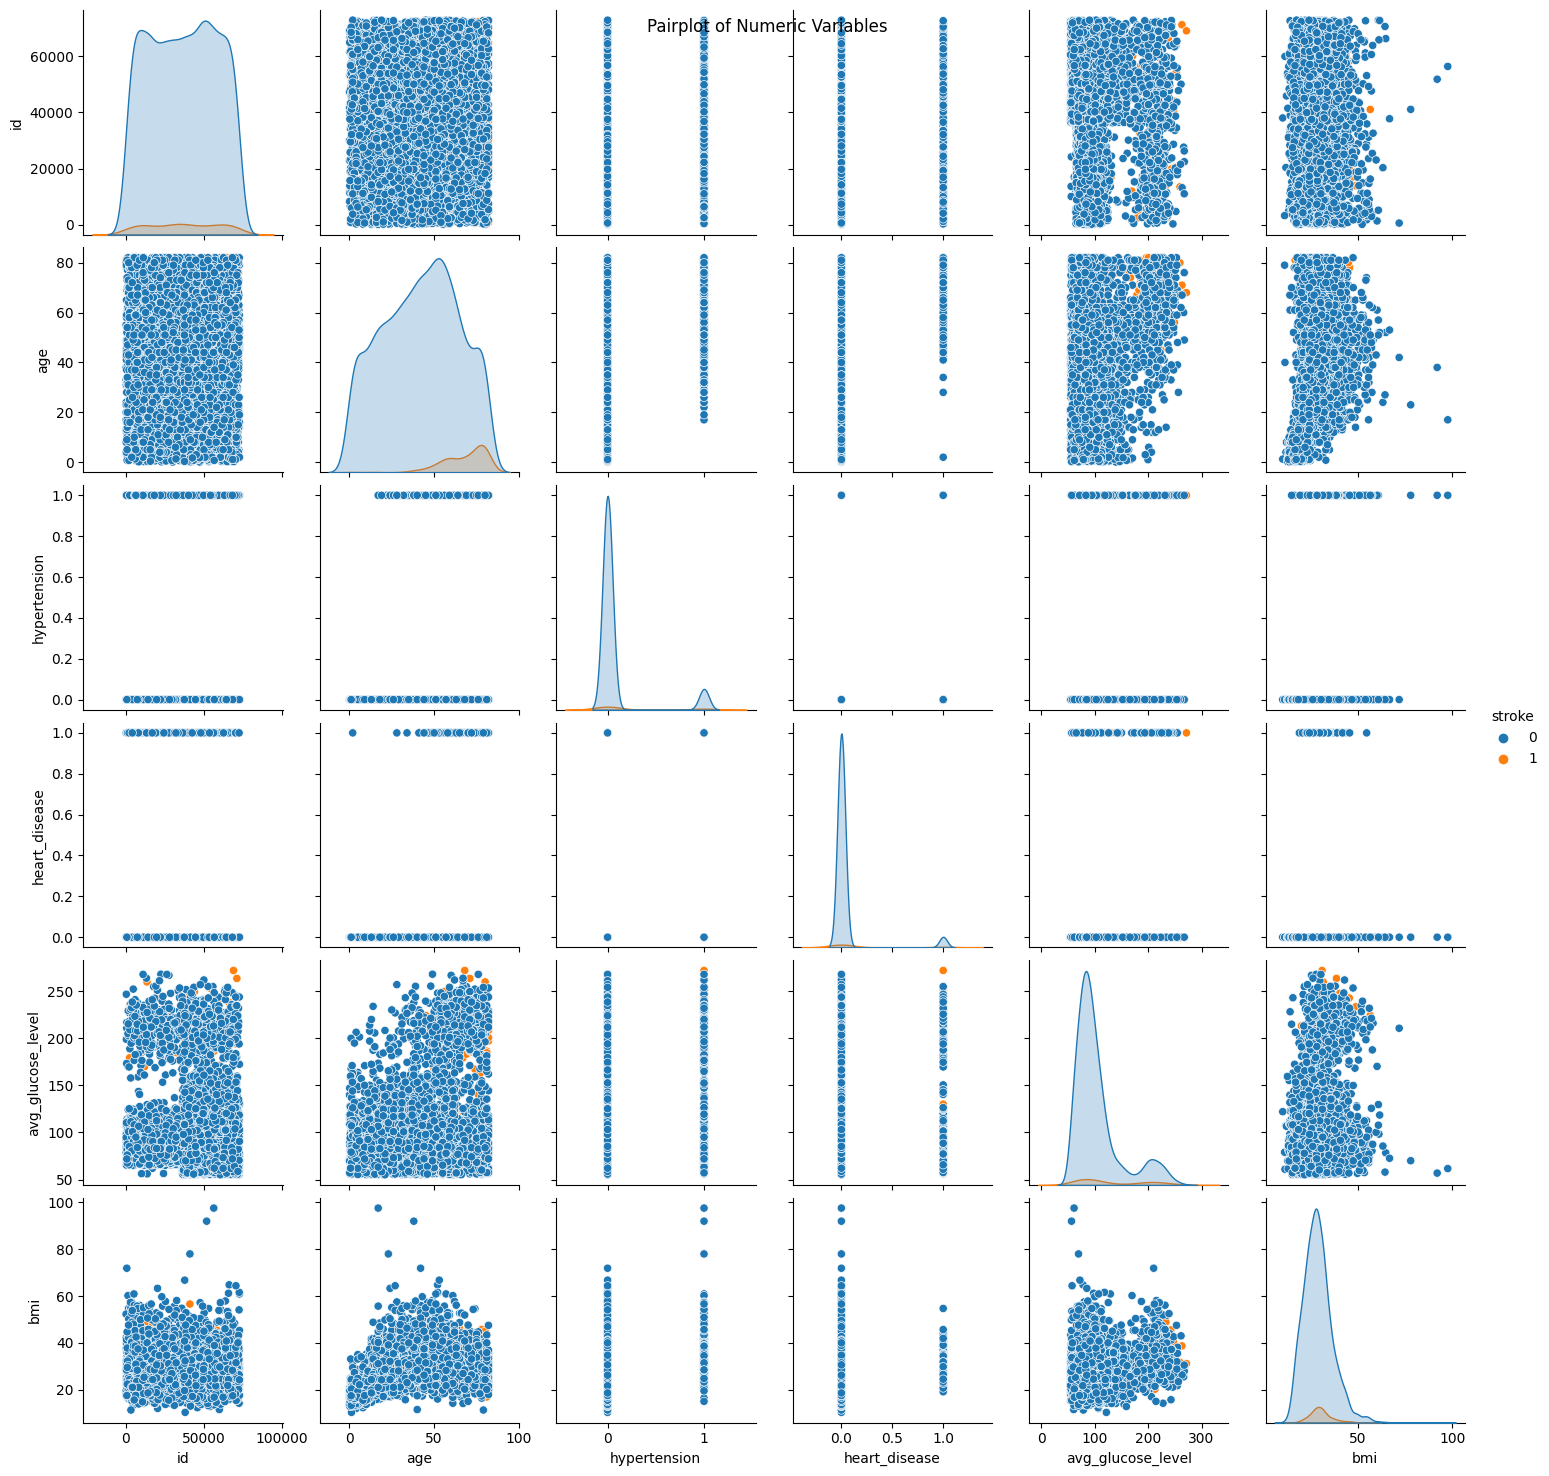

In [39]:
sns.pairplot(df, hue="stroke", diag_kind="kde")
plt.suptitle("Pairplot of Numeric Variables")
plt.show()

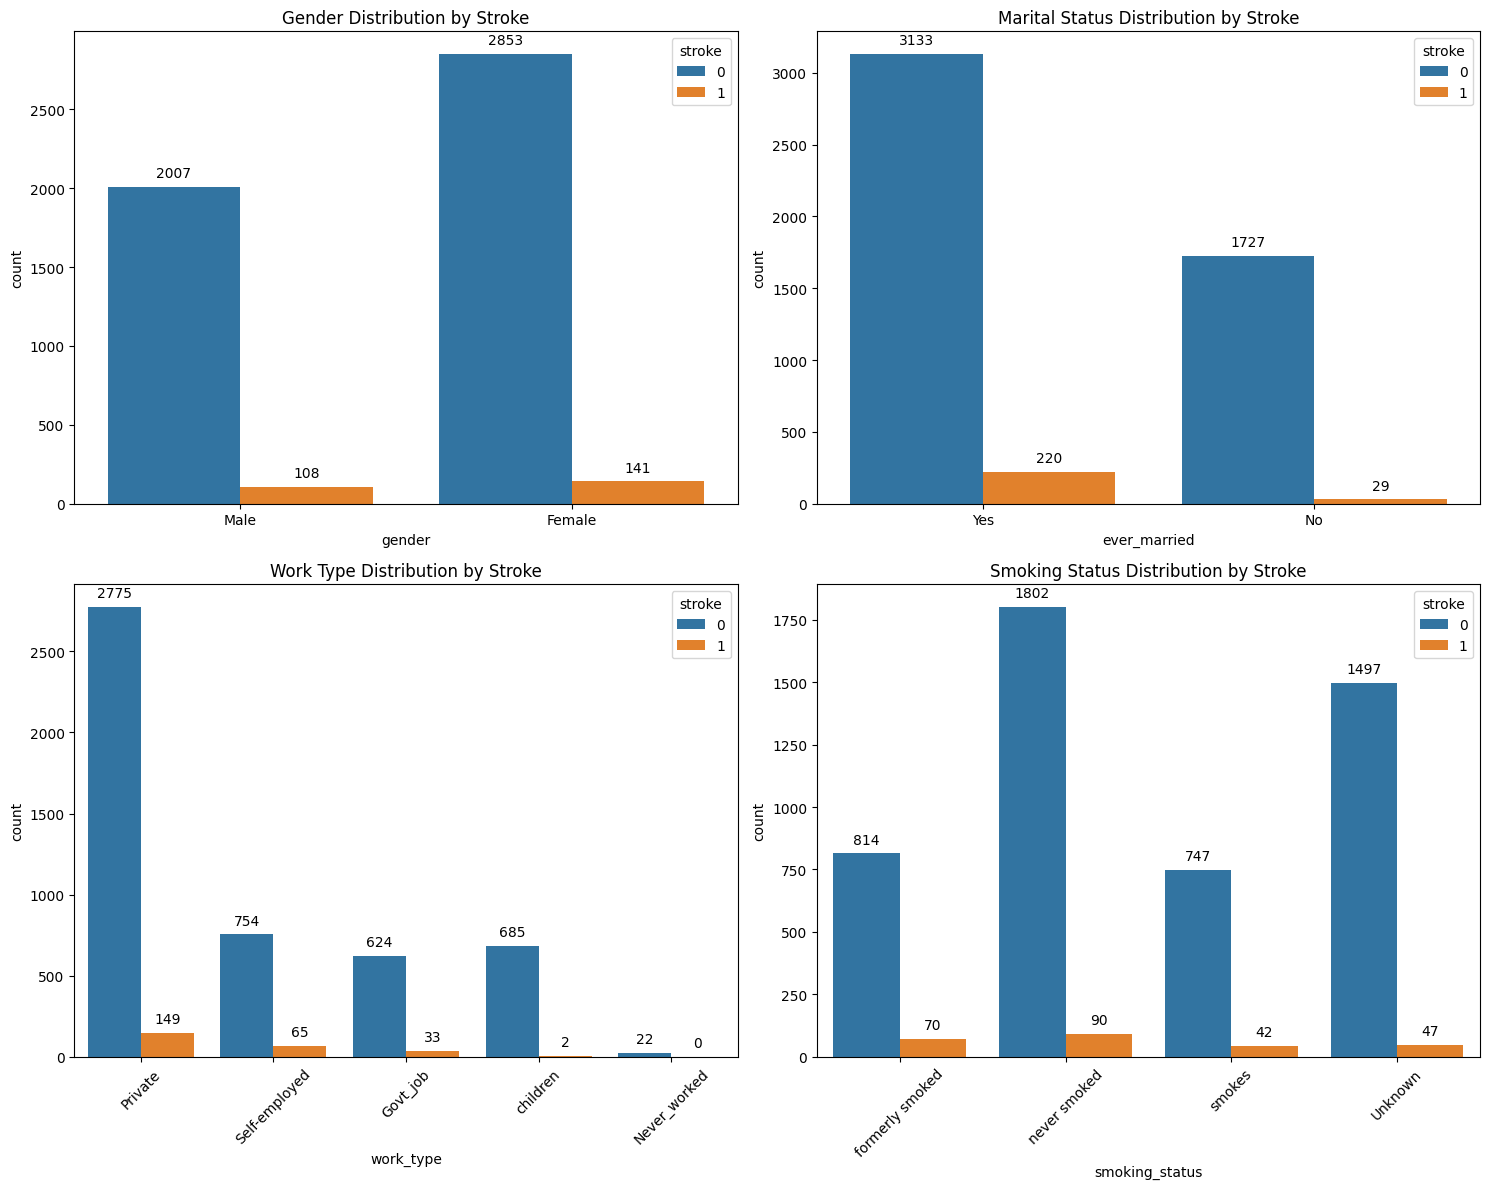

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up a 2x2 grid for subplots
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# Gender
plt.subplot(2, 2, 1)
ax1 = sns.countplot(x="gender", hue="stroke", data=df)
plt.title("Gender Distribution by Stroke")
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')

# Marital Status
plt.subplot(2, 2, 2)
ax2 = sns.countplot(x="ever_married", hue="stroke", data=df)
plt.title("Marital Status Distribution by Stroke")
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')

# Work Type
plt.subplot(2, 2, 3)
ax3 = sns.countplot(x="work_type", hue="stroke", data=df)
plt.xticks(rotation=45)
plt.title("Work Type Distribution by Stroke")
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')

# Smoking Status
plt.subplot(2, 2, 4)
ax4 = sns.countplot(x="smoking_status", hue="stroke", data=df)
plt.xticks(rotation=45)
plt.title("Smoking Status Distribution by Stroke")
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.0f'),
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center',
                 xytext = (0, 10),
                 textcoords = 'offset points')

plt.tight_layout()
plt.show()



In [43]:
# Drop single 'Other' gender
df = df[df['gender'] != 'Other']

# Calculate relationships for each categorical variable
categorical_vars = ['gender', 'ever_married', 'work_type', 'smoking_status']

for var in categorical_vars:
    relationship = df.groupby([var, 'stroke']).size().unstack()
    relationship['Total'] = relationship.sum(axis=1)
    relationship['Stroke %'] = (relationship[1] / relationship['Total']) * 100
    print(f"Relationship between {var} and Stroke:")
    print(relationship)
    print("\n")


Relationship between gender and Stroke:
stroke     0    1  Total  Stroke %
gender                            
Female  2853  141   2994  4.709419
Male    2007  108   2115  5.106383


Relationship between ever_married and Stroke:
stroke           0    1  Total  Stroke %
ever_married                            
No            1727   29   1756  1.651481
Yes           3133  220   3353  6.561288


Relationship between work_type and Stroke:
stroke              0      1   Total  Stroke %
work_type                                     
Govt_job        624.0   33.0   657.0  5.022831
Never_worked     22.0    NaN    22.0       NaN
Private        2775.0  149.0  2924.0  5.095759
Self-employed   754.0   65.0   819.0  7.936508
children        685.0    2.0   687.0  0.291121


Relationship between smoking_status and Stroke:
stroke              0   1  Total  Stroke %
smoking_status                            
Unknown          1497  47   1544  3.044041
formerly smoked   814  70    884  7.918552
never smoked

* Gender: Stroke incidence is slightly higher in males (5.11%) compared to females (4.71%)
* Marital Status: Married individuals have a higher stroke occurrence (6.56%) than those who are not married (1.65%)
* Work Type: Self-employed individuals show the highest stroke percentage (7.94%), while children exhibit the lowest (0.29%)

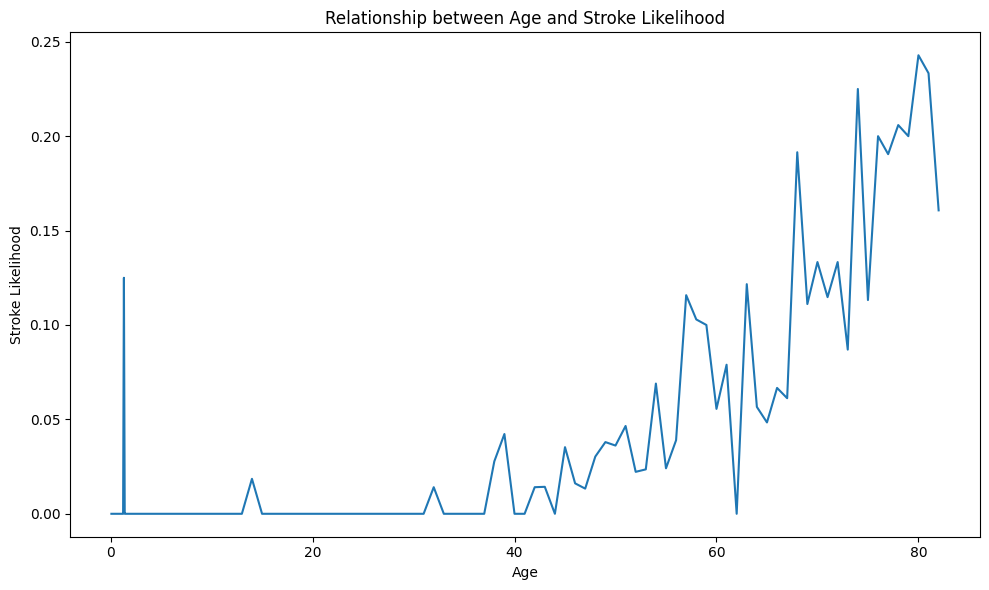

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

sns.lineplot(x="age", y="stroke", data=df, estimator="mean", errorbar=None)

plt.title("Relationship between Age and Stroke Likelihood")
plt.xlabel("Age")
plt.ylabel("Stroke Likelihood")

plt.tight_layout()
plt.show()

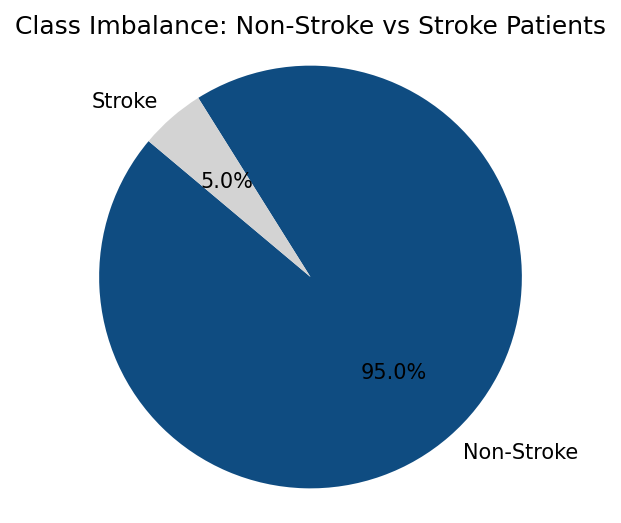

In [56]:
import matplotlib.pyplot as plt

# Data
labels = ['Non-Stroke', 'Stroke']
sizes = [4751, 249]
colors = ['#0f4c81', "lightgray"]

# Create a pie chart
plt.figure(figsize=(4, 4), dpi=150)
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Add a title
plt.title('Class Imbalance: Non-Stroke vs Stroke Patients')

# Show the plot
plt.show()


In [59]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 3.2 MB/s eta 0:00:00


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform one-hot encoding on categorical features for training data
X_train_encoded = encoder.fit_transform(X_train[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Transform one-hot encoding on categorical features for test data
X_test_encoded = encoder.transform(X_test[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Apply SMOTE to oversample the training data
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train_encoded, y_train.ravel())

# Initialize classifiers
svm_classifier = SVC()
rf_classifier = RandomForestClassifier()
xgb_classifier = XGBClassifier()
ada_classifier = AdaBoostClassifier()
lr_classifier = LogisticRegression()
catboost_classifier = CatBoostClassifier()

# Train classifiers
svm_classifier.fit(X_train_resh, y_train_resh)
rf_classifier.fit(X_train_resh, y_train_resh)
xgb_classifier.fit(X_train_resh, y_train_resh)
ada_classifier.fit(X_train_resh, y_train_resh)
lr_classifier.fit(X_train_resh, y_train_resh)
catboost_classifier.fit(X_train_resh, y_train_resh)

# Predict using classifiers
svm_pred = svm_classifier.predict(X_test_encoded)
rf_pred = rf_classifier.predict(X_test_encoded)
xgb_pred = xgb_classifier.predict(X_test_encoded)
ada_pred = ada_classifier.predict(X_test_encoded)
lr_pred = lr_classifier.predict(X_test_encoded)
catboost_pred = catboost_classifier.predict(X_test_encoded)

# Evaluate classifiers
print("SVM Classification Report:\n", classification_report(y_test, svm_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))
print("AdaBoost Classification Report:\n", classification_report(y_test, ada_pred))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_pred))
print("CatBoost Classification Report:\n", classification_report(y_test, catboost_pred))


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Learning rate set to 0.024766
0:	learn: 0.6842557	total: 9.76ms	remaining: 9.75s
1:	learn: 0.6759704	total: 18.2ms	remaining: 9.07s
2:	learn: 0.6682264	total: 26.4ms	remaining: 8.78s
3:	learn: 0.6625257	total: 36.2ms	remaining: 9.01s
4:	learn: 0.6556353	total: 45.8ms	remaining: 9.11s
5:	learn: 0.6491331	total: 52.2ms	remaining: 8.64s
6:	learn: 0.6442748	total: 55.6ms	remaining: 7.89s
7:	learn: 0.6377293	total: 59.1ms	remaining: 7.33s
8:	learn: 0.6322575	total: 62.6ms	remaining: 6.89s
9:	learn: 0.6287445	total: 66.4ms	remaining: 6.57s
10:	learn: 0.6237412	total: 69.9ms	remaining: 6.28s
11:	learn: 0.6202393	total: 73.7ms	remaining: 6.07s
12:	learn: 0.6154299	total: 78.9ms	remaining: 5.99s
13:	learn: 0.6116734	total: 83ms	remaining: 5.84s
14:	learn: 0.6086253	total: 86.5ms	remaining: 5.68s
15:	learn: 0.6057074	total: 90.6ms	remaining: 5.57s
16:	learn: 0.6032091	total: 94.1ms	remaining: 5.44s
17:	learn: 0.6003076	total: 97.6ms	remaining: 5.33s
18:	learn: 0.5970411	total: 102ms	remaining: 5

In [68]:
from sklearn.model_selection import GridSearchCV

# Define parameter grids for each classifier
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cat_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV for each classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, scoring='f1', cv=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, scoring='f1', cv=5)
xgb_grid = GridSearchCV(XGBClassifier(), xgb_param_grid, scoring='f1', cv=5)
cat_grid = GridSearchCV(CatBoostClassifier(), cat_param_grid, scoring='f1', cv=5)

# Fit the tuned models
svm_grid.fit(X_train_resh, y_train_resh)
rf_grid.fit(X_train_resh, y_train_resh)
xgb_grid.fit(X_train_resh, y_train_resh)
cat_grid.fit(X_train_resh, y_train_resh)

# Predict using tuned models
svm_pred_tuned = svm_grid.predict(X_test_encoded)
rf_pred_tuned = rf_grid.predict(X_test_encoded)
xgb_pred_tuned = xgb_grid.predict(X_test_encoded)
cat_pred_tuned = cat_grid.predict(X_test_encoded)

# Evaluate tuned models
print("Tuned SVM Classification Report:\n", classification_report(y_test, svm_pred_tuned))
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, rf_pred_tuned))
print("Tuned XGBoost Classification Report:\n", classification_report(y_test, xgb_pred_tuned))
print("Tuned CatBoost Classification Report:\n", classification_report(y_test, cat_pred_tuned))


Streaming output truncated to the last 5000 lines.
140:	learn: 0.4344022	total: 1.49s	remaining: 1.68s
141:	learn: 0.4342750	total: 1.5s	remaining: 1.67s
142:	learn: 0.4340780	total: 1.5s	remaining: 1.65s
143:	learn: 0.4339945	total: 1.51s	remaining: 1.63s
144:	learn: 0.4339024	total: 1.51s	remaining: 1.62s
145:	learn: 0.4337743	total: 1.52s	remaining: 1.6s
146:	learn: 0.4336044	total: 1.52s	remaining: 1.59s
147:	learn: 0.4335629	total: 1.53s	remaining: 1.57s
148:	learn: 0.4335029	total: 1.54s	remaining: 1.56s
149:	learn: 0.4333402	total: 1.54s	remaining: 1.54s
150:	learn: 0.4332570	total: 1.55s	remaining: 1.53s
151:	learn: 0.4331016	total: 1.55s	remaining: 1.51s
152:	learn: 0.4330338	total: 1.56s	remaining: 1.5s
153:	learn: 0.4329804	total: 1.56s	remaining: 1.48s
154:	learn: 0.4328980	total: 1.57s	remaining: 1.47s
155:	learn: 0.4328429	total: 1.57s	remaining: 1.45s
156:	learn: 0.4327155	total: 1.58s	remaining: 1.44s
157:	learn: 0.4325375	total: 1.59s	remaining: 1.43s
158:	learn: 0.432

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Load the dataset into a Pandas DataFrame
dataset = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(dataset)

# Remove rows with 'Other' category in 'gender' column
df = df[df['gender'] != 'Other']

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse=False)

# Fit and transform one-hot encoding on categorical features for training data
X_train_encoded = encoder.fit_transform(X_train[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Transform one-hot encoding on categorical features for test data
X_test_encoded = encoder.transform(X_test[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Apply SMOTE to oversample the training data
oversample = SMOTE()
X_train_resh, y_train_resh = oversample.fit_resample(X_train_encoded, y_train.ravel())

# Initialize classifiers for baseline
classifiers_baseline = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'CatBoost': CatBoostClassifier()
}

# Train and evaluate classifiers for baseline
classification_reports_baseline = {}
for name, classifier in classifiers_baseline.items():
    classifier.fit(X_train_resh, y_train_resh)
    y_pred = classifier.predict(X_test_encoded)
    classification_reports_baseline[name] = classification_report(y_test, y_pred, output_dict=True)

# Perform bias removal (e.g., by using more representative data or re-sampling techniques)
# One-hot encode 'gender' variable
X_encoded = pd.get_dummies(X, columns=['gender'], drop_first=True)

# One-hot encode 'ever_married' variable
X_encoded = pd.get_dummies(X_encoded, columns=['ever_married'], drop_first=True)

# One-hot encode 'work_type' variable
X_encoded = pd.get_dummies(X_encoded, columns=['work_type'], drop_first=True)

# Binary encode 'Residence_type' variable
X_encoded['Residence_type'] = X_encoded['Residence_type'].map({'Rural': 0, 'Urban': 1})

# One-hot encode 'smoking_status' variable
X_encoded = pd.get_dummies(X_encoded, columns=['smoking_status'], drop_first=True)

# Re-initialize classifiers after bias removal
classifiers_removed_bias = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Logistic Regression': LogisticRegression(),
    'CatBoost': CatBoostClassifier()
}

# Train and evaluate classifiers after bias removal
classification_reports_removed_bias = {}
for name, classifier in classifiers_removed_bias.items():
    classifier.fit(X_train_resh, y_train_resh)
    y_pred = classifier.predict(X_test_encoded)
    classification_reports_removed_bias[name] = classification_report(y_test, y_pred, output_dict=True)

# Define parameter grids for each classifier
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
}

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

cat_param_grid = {
    'iterations': [100, 200, 300],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
}

# Initialize GridSearchCV for each classifier
svm_grid = GridSearchCV(SVC(), svm_param_grid, scoring='f1', cv=5)
rf_grid = GridSearchCV(RandomForestClassifier(), rf_param_grid, scoring='f1', cv=5)
xgb_grid = GridSearchCV(XGBClassifier(), xgb_param_grid, scoring='f1', cv=5)
cat_grid = GridSearchCV(CatBoostClassifier(), cat_param_grid, scoring='f1', cv=5)

# Fit the tuned models
svm_grid.fit(X_train_resh, y_train_resh)
rf_grid.fit(X_train_resh, y_train_resh)
xgb_grid.fit(X_train_resh, y_train_resh)
cat_grid.fit(X_train_resh, y_train_resh)

# Predict using tuned models
svm_pred_tuned = svm_grid.predict(X_test_encoded)
rf_pred_tuned = rf_grid.predict(X_test_encoded)
xgb_pred_tuned = xgb_grid.predict(X_test_encoded)
cat_pred_tuned = cat_grid.predict(X_test_encoded)

# Initialize classifiers for after removing biases with hyperparameter tuning outcomes
classifiers_removed_bias_tuned = {
    'SVM': SVC(**svm_grid.best_params_),
    'Random Forest': RandomForestClassifier(**rf_grid.best_params_),
    'XGBoost': XGBClassifier(**xgb_grid.best_params_),
    'CatBoost': CatBoostClassifier(**cat_grid.best_params_)
}

# Train and evaluate classifiers after removing biases with hyperparameter tuning outcomes
classification_reports_removed_bias_tuned = {}
for name, classifier in classifiers_removed_bias_tuned.items():
    classifier.fit(X_train_resh, y_train_resh)
    y_pred = classifier.predict(X_test_encoded)
    classification_reports_removed_bias_tuned[name] = classification_report(y_test, y_pred, output_dict=True)

# Display classification reports for baseline
print("Classification Reports for Baseline:")
for name, report in classification_reports_baseline.items():
    print(f"{name}:\n", report['weighted avg'])
    print("-" * 40)

# Display classification reports for bias removed
print("Classification Reports After Bias Removal:")
for name, report in classification_reports_removed_bias.items():
    print(f"{name}:\n", report['weighted avg'])
    print("-" * 40)

# Display classification reports for bias removed with hyperparameter tuning
print("Classification Reports After Bias Removal with Hyperparameter Tuning:")
for name, report in classification_reports_removed_bias_tuned.items():
    print(f"{name}:\n", report['weighted avg'])
    print("-" * 40)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Streaming output truncated to the last 5000 lines.
151:	learn: 0.4151184	total: 955ms	remaining: 930ms
152:	learn: 0.4149834	total: 960ms	remaining: 923ms
153:	learn: 0.4149170	total: 966ms	remaining: 916ms
154:	learn: 0.4147133	total: 972ms	remaining: 909ms
155:	learn: 0.4146335	total: 978ms	remaining: 902ms
156:	learn: 0.4145777	total: 984ms	remaining: 896ms
157:	learn: 0.4144491	total: 992ms	remaining: 891ms
158:	learn: 0.4143401	total: 998ms	remaining: 885ms
159:	learn: 0.4142903	total: 1s	remaining: 878ms
160:	learn: 0.4142336	total: 1.01s	remaining: 871ms
161:	learn: 0.4140432	total: 1.01s	remaining: 864ms
162:	learn: 0.4139749	total: 1.02s	remaining: 858ms
163:	learn: 0.4138984	total: 1.03s	remaining: 851ms
164:	learn: 0.4138396	total: 1.03s	remaining: 846ms
165:	learn: 0.4137776	total: 1.04s	remaining: 844ms
166:	learn: 0.4137352	total: 1.05s	remaining: 837ms
167:	learn: 0.4135479	total: 1.06s	remaining: 830ms
168:	learn: 0.4134640	total: 1.06s	remaining: 824ms
169:	learn: 0.41

In [84]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

# Load the dataset into a Pandas DataFrame
dataset = 'healthcare-dataset-stroke-data.csv'
df = pd.read_csv(dataset)

# Remove records with 'Other' gender
df = df[df['gender'] != 'Other']

# Separate features and target variable
X = df.drop(columns=['stroke'])
y = df['stroke']

# One-hot encode categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
X_encoded = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

# Handle missing values using an imputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Print class distribution before applying SMOTE
print("Class distribution before applying SMOTE:")
print(y.value_counts())

# Apply SMOTE to oversample the data
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X_imputed, y)

# Convert the resampled data back to a DataFrame
resampled_df = pd.concat([pd.DataFrame(X_resampled, columns=X_encoded.columns), y_resampled], axis=1)

# Print class distribution after applying SMOTE
print("Class distribution after applying SMOTE:")
print(resampled_df['stroke'].value_counts())



Class distribution before applying SMOTE:
0    4860
1     249
Name: stroke, dtype: int64
Class distribution after applying SMOTE:
1    4860
0    4860
Name: stroke, dtype: int64
